EDA 1

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "BIKE DETAILS.csv"
df = pd.read_csv(file_path)
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha 

In [3]:
# 1.What is the range of selling prices in the dataset?

selling_price_range = (df["selling_price"].min(), df["selling_price"].max())
print("1. Selling Price Range:", selling_price_range)

1. Selling Price Range: (np.int64(5000), np.int64(760000))


In [4]:
# 2. What is the median selling price for bikes in the dataset?
median_selling_price = df["selling_price"].median()
print("2. Median Selling Price:", median_selling_price)

2. Median Selling Price: 45000.0


In [5]:
# 3. What is the most common seller type?
most_common_seller_type = df["seller_type"].mode()[0]
print("3. Most Common Seller Type:", most_common_seller_type)

3. Most Common Seller Type: Individual


In [6]:
# 4. How many bikes have driven more than 50,000 kilometers?
bikes_above_50000_km = (df["km_driven"] > 50000).sum()
print("4. Bikes driven more than 50,000 km:", bikes_above_50000_km)

4. Bikes driven more than 50,000 km: 170


In [7]:
# 5. What is the average km_driven value for each ownership type?
avg_km_driven_by_owner = df.groupby("owner")["km_driven"].mean()
print("5. Average km driven per ownership type:\n", avg_km_driven_by_owner)

5. Average km driven per ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [8]:
# 6. What proportion Of bikes are from the year 2015 or Older?
bikes_2015_or_older = (df["year"] <= 2015).sum() / len(df)
print("6. Proportion of bikes from 2015 or older:", bikes_2015_or_older)

6. Proportion of bikes from 2015 or older: 0.5664467483506126


In [9]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("7. Missing Values:\n", missing_values)

7. Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [10]:
# 8. What is the highest recorded, and for which bike?
highest_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_highest_price = df[df["ex_showroom_price"] == highest_ex_showroom_price]["name"].values[0] if pd.notna(highest_ex_showroom_price) else None
print("8. Highest Ex-Showroom Price:", highest_ex_showroom_price, "for", bike_with_highest_price)

8. Highest Ex-Showroom Price: 1278000.0 for Harley-Davidson Street Bob


In [11]:
# 9. What is the total number of bikes listed by each seller type?
bikes_per_seller_type = df["seller_type"].value_counts()
print("9. Bikes listed by seller type:\n", bikes_per_seller_type)

9. Bikes listed by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


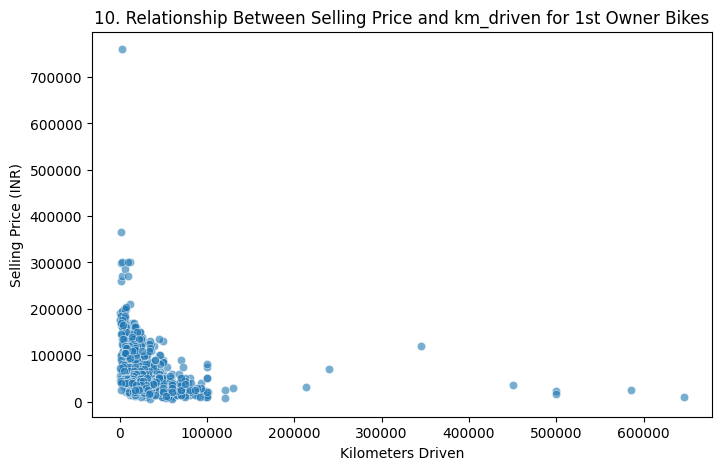

In [12]:
# 10. What is the relationship between selling _ price and km_driven for first-owner bikes?
first_owner_bikes = df[df["owner"] == "1st owner"]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"], alpha=0.6)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title("10. Relationship Between Selling Price and km_driven for 1st Owner Bikes")
plt.show()

In [13]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
print("11. Outliers removed:", len(df) - len(df_no_outliers))

11. Outliers removed: 39


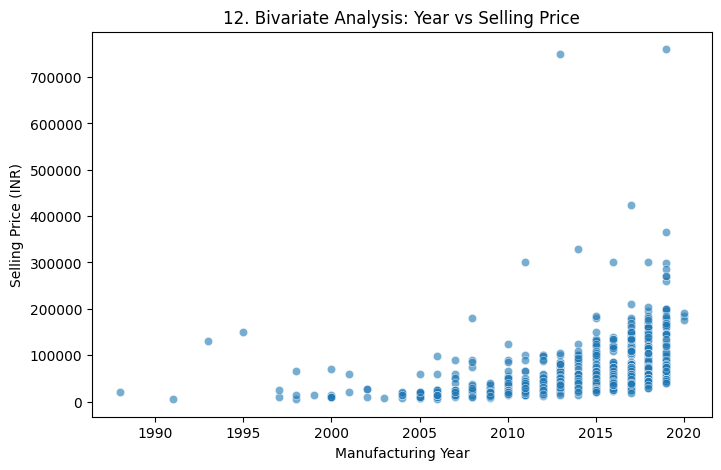

In [17]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling _ price.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"], alpha=0.6)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.title("12. Bivariate Analysis: Year vs Selling Price")
plt.show()

In [18]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year)?
current_year = 2025
df["bike_age"] = current_year - df["year"]
avg_depreciation = df.groupby("bike_age")["selling_price"].mean().diff().mean()
print("13. Average depreciation in selling price per year:", avg_depreciation)


13. Average depreciation in selling price per year: -6049.382716049383


In [19]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_per_year = df.groupby("year")["selling_price"].mean()
threshold_factor = 1.5
df["above_avg_price"] = df.apply(lambda row: row["selling_price"] > threshold_factor * avg_price_per_year[row["year"]], axis=1)
high_priced_bikes = df[df["above_avg_price"]][["name", "year", "selling_price"]]
print("14. Bikes priced significantly above average:\n", high_priced_bikes)

14. Bikes priced significantly above average:
                                      name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


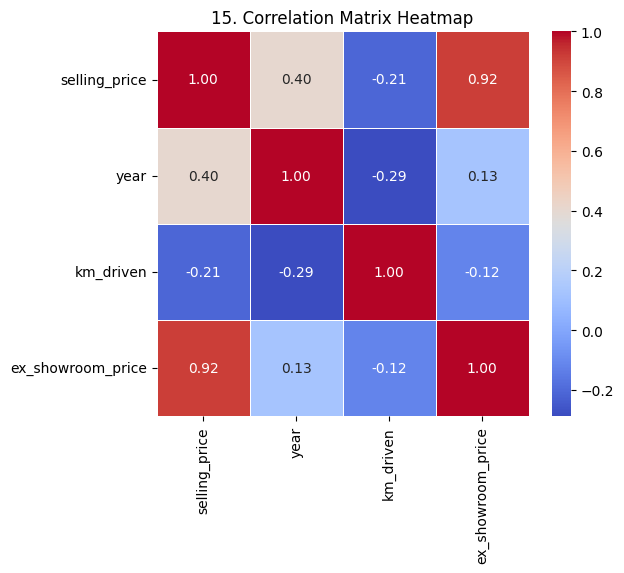

In [20]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = df[["selling_price", "year", "km_driven", "ex_showroom_price"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("15. Correlation Matrix Heatmap")
plt.show()